In [14]:
import requests
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns
from sodapy import Socrata

I am a bit too confused for the evening to continue on this for the evening, but i look forward to tackling it on Saturday

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

response = requests.get(endpoint)

Using a smarter person's documentation on how to get SODA consumer API working
https://holowczak.com/getting-started-with-nyc-opendata-and-the-socrata-api/5/

In [3]:
data_url='data.nashville.gov'    # The Host Name for the API endpoint (the https:// part will be added automatically)
data_set='fuaa-r5cm'    # The data set at the API endpoint (311 data in this case)
app_token='1NEpltWqHEPKa8Gs8qXhUIyel'   # The app token created in the prior steps
client = Socrata(data_url,app_token)      # Create the client to point to the API endpoint
# Set the timeout to 60 seconds    
client.timeout = 60
# Retrieve the first 2000 results returned as JSON object from the API
# The SoDaPy library converts this JSON object to a Python list of dictionaries
results = client.get(data_set, limit=2000)
# Convert the list of dictionaries to a Pandas data frame
df = pd.DataFrame.from_records(results)
# Save the data frame to a CSV file
df.to_csv("my_top500searches.csv")

In [4]:
with open('../data/keys.json') as fi:
    credentials = json.load(fi)

In [5]:
metadata = client.get_metadata(data_set)
[x['name'] for x in metadata['columns']]

['Month Name', 'Month', 'Year', 'Query Count', 'Query Text']

Q1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?
August had the most!

In [6]:
endpoint1 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?year=2016&query_text=fire&$order= query_count DESC'

response1 = requests.get(endpoint1)

response1.json()

[{'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'December',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_tex

Q2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?
Looks like 1000!(?)

In [7]:
endpoint2 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where= query_count > 100'

response2 = requests.get(endpoint2)

len(response2.json())

1000

Q3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?
56 times!

In [8]:
endpoint3 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?query_text=codes&$where= query_count > 100'

response3 = requests.get(endpoint3)

len(response3.json())

56

Q4.Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [20]:
df['year'] = df['year'].astype(int)
df['query_count'] = df['query_count'].astype(int)
df

,month_name,year,query_count,query_text
0,January,2014,223,ebid
1,January,2014,112,property maps
2,January,2014,97,maps
3,January,2014,90,property tax
4,January,2014,76,jobs
...,...,...,...,...
1995,April,2014,7,metro action commission
1996,April,2014,7,sponsorship rules
1997,April,2014,7,seasonal
1998,April,2014,7,Cumberland park


In [21]:
maps_df= df[df['query_text']=='maps']

C:\Users\phili\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


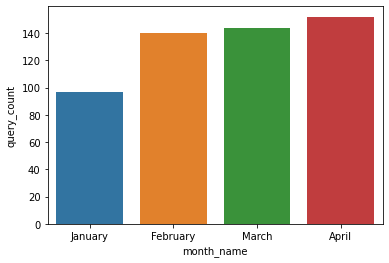

In [22]:
maps_bar = sns.barplot(maps_df['month_name'],maps_df['query_count'])
#maps_bar.set_xticklabels(maps_bar.get_xticklabels(), rotation=45, horizontalalignment='right')